In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [44]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Dataset

In [5]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [6]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Remove the columns which were not needed for modelling

In [7]:
x=dataset.drop(labels=["CustomerId","RowNumber","Exited","Surname"],axis=1)
y=datset["Exited"]

In [8]:
x.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

#### The Geography and Gender are categorical variable, since they are not ordinal values We can use onehotencoding to convert it to numeric feature

In [10]:
x=pd.get_dummies(x,drop_first=True,columns=["Geography","Gender"])

In [11]:
x.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
x["Gender_Male"].value_counts()

1    5457
0    4543
Name: Gender_Male, dtype: int64

### Train Test split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### Standardisation of values

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Fit the Model

In [37]:
model=Sequential()
model.add(Dense(x.shape[1],activation='relu',input_dim=x.shape[1]))
model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [61]:
model.compile(optimizer="Adam",loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [62]:
#since x_train has only numpy values convert y_train to numpy
history=model.fit(x_train,y_train.to_numpy(),batch_size=20,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
320/320 [==============================] - 4s 10ms/step - loss: 0.3218 - accuracy: 0.8652 - val_loss: 0.2963 - val_accuracy: 0.8856
Epoch 2/10
320/320 [==============================] - 3s 8ms/step - loss: 0.3206 - accuracy: 0.8653 - val_loss: 0.2980 - val_accuracy: 0.8800
Epoch 3/10
320/320 [==============================] - 3s 9ms/step - loss: 0.3205 - accuracy: 0.8645 - val_loss: 0.3021 - val_accuracy: 0.8825
Epoch 4/10
320/320 [==============================] - 4s 11ms/step - loss: 0.3194 - accuracy: 0.8661 - val_loss: 0.3063 - val_accuracy: 0.8800
Epoch 5/10
320/320 [==============================] - 3s 8ms/step - loss: 0.3193 - accuracy: 0.8650 - val_loss: 0.3055 - val_accuracy: 0.8775
Epoch 6/10
320/320 [==============================] - 3s 9ms/step - loss: 0.3181 - accuracy: 0.8659 - val_loss: 0.3030 - val_accuracy: 0.8813
Epoch 7/10
320/320 [==============================] - 3s 10ms/step - loss: 0.3164 - accuracy: 0.8662 - val_loss: 0.3052 - val_accuracy: 0.8813
Epo

### Evaluate the Model

In [63]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 6ms/step - loss: 0.3384 - accuracy: 0.8650


[0.33840733766555786, 0.8650000095367432]

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=model.predict_classes(x_test)
accuracy_score(y_test,y_pred)

0.865

In [65]:
confusion_matrix(y_test,y_pred)

array([[1529,   64],
       [ 206,  201]], dtype=int64)

### Plotting learning curve and confusion matrix

In [ ]:
# to plot confusion matrix download mlextend
!pip install mlxtend


In [68]:
# the info abot the loss and the accuracy of each epoch is available in history
history.history

{'loss': [0.3217889368534088,
  0.3206285834312439,
  0.32050955295562744,
  0.31944313645362854,
  0.3193296790122986,
  0.3180522620677948,
  0.3164083957672119,
  0.3174237012863159,
  0.31639447808265686,
  0.3149429261684418],
 'accuracy': [0.8651562333106995,
  0.8653125166893005,
  0.8645312786102295,
  0.8660937547683716,
  0.8650000095367432,
  0.8659374713897705,
  0.8662499785423279,
  0.8662499785423279,
  0.8659374713897705,
  0.8667187690734863],
 'val_loss': [0.2963298261165619,
  0.29796600341796875,
  0.30209028720855713,
  0.306329607963562,
  0.3054959774017334,
  0.30295416712760925,
  0.30520516633987427,
  0.3111847937107086,
  0.3080463707447052,
  0.3078431189060211],
 'val_accuracy': [0.8856250047683716,
  0.8799999952316284,
  0.8824999928474426,
  0.8799999952316284,
  0.8774999976158142,
  0.8812500238418579,
  0.8812500238418579,
  0.8762500286102295,
  0.8774999976158142,
  0.8756250143051147]}

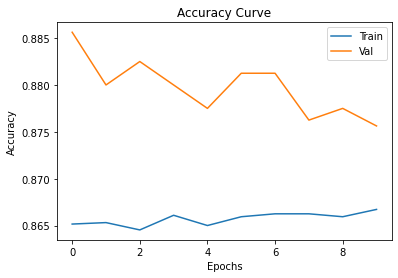

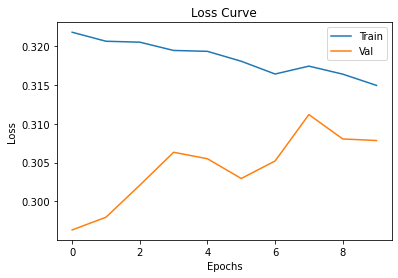

In [71]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend(["Train","Val"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Train","Val"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()